# Data preprocessing 2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. Unzip data

In [ ]:
! unzip -qq "/content/drive/MyDrive/Mexican Sign Language Recognition-202205-DB.zip"

### Helper function

In [ ]:
# Plot the validation and training data separately
import matplotlib.pyplot as plt

def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.

  Args:
    history: TensorFlow model History object (see: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History)
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();


## 2. Import dependency

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd
import numpy as np
import glob
import os
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tqdm import tqdm
import tensorflow as tf

SEED = 42
tf.random.set_seed(SEED)
np.random.seed(SEED)

## 3. Get Class Names
* 3.1. ClassNames
* 3.2. Get ClassDict

### 3.1. get_className

In [ ]:
def get_className(files_list):
    classNames = []
    for file in files_list:
        label = file.split("/")[-1].split("_")[0]
        if label not in classNames:
            classNames.append(label)
    classNames.sort()
    return classNames

### 3.2. get_classDict

In [ ]:
def get_classDict(classNames):
    classDict = {}
    for index, className in enumerate(classNames):
        classDict[className] = index
    return classDict

## 4. Data load
* 4.1. load_data
* 4.2. get_dataFrame

### 4.1. load_data (data, label)

In [ ]:
def load_data(filePath, classDict, totalClass):
    df = pd.read_csv(filePath).iloc[: ,1:].to_numpy()
    label = classDict[filePath.split("/")[-1].split("_")[0]]
    # label = tf.keras.utils.to_categorical(label, totalClass, dtype='int8')
    return df, label

### 4.2. get_dataFrame(dataFrame, labels)

In [ ]:
def get_dataFrame(filesList, classDict, classNames):
    dataFrame = []
    labels = []
    for filePath in tqdm(filesList):
        data, label = load_data(filePath, classDict, len(classNames))
        dataFrame.append(data)
        labels.append(label)
    dataFrame = np.array(dataFrame)
    labels = np.array(labels)
    return dataFrame, labels

## 5. Data preprocessing
* 5.1. labels_oneHot_Encoding
* 5.2. preprocessing (shifting and scaling)

### 5.1. labels_oneHot_Encoding

In [ ]:
def labels_oneHot_Encoding(labels, totalClasses):
    return tf.keras.utils.to_categorical(labels, totalClasses, dtype='int8')

## 6. Call all function and get file path
* 6.1. Csv files dir
* 6.2. Get all Files list
* 6.3. get classNames and classDict
* 6.4. get dataFrame and labels
* 6.5. data preprocessing
* 6.6. labels one hot
* 6.7. Data zip
* 6.8. Data shuffle
* 6.9. Data batch

### 6.1. Csv files dir

In [ ]:
train_dir = "/content/Mexican Sign Language Recognition/TrainingValidation"
test_dir = "/content/Mexican Sign Language Recognition/Testing"

### 6.2. Get all files list

In [ ]:
train_files = glob.glob(f"{train_dir}/*.csv")
test_files = glob.glob(f"{test_dir}/*.csv")

### 6.3. get classNames and classDict

In [ ]:
classNames = get_className(train_files)
classDict = get_classDict(classNames)

### 6.4. get dataFrame and labels

In [ ]:
trainData, trainLabels =  get_dataFrame(train_files, classDict, classNames)

100%|██████████| 2550/2550 [00:19<00:00, 132.62it/s]


In [ ]:
testData, testLabels =  get_dataFrame(test_files, classDict, classNames)

100%|██████████| 450/450 [00:04<00:00, 98.08it/s] 


In [ ]:
trainData.shape, testData.shape, trainLabels.shape, testLabels.shape

((2550, 20, 201), (450, 20, 201), (2550,), (450,))

### 6.6. Labels onehot encoding

In [ ]:
trainLabels[:10]

array([23, 28, 28, 21,  5,  3, 15, 20,  0, 19])

In [ ]:
# trainLabels = labels_oneHot_Encoding(trainLabels, len(classNames))
# testLabels = labels_oneHot_Encoding(testLabels, len(classNames))
import tensorflow.keras.utils as tfut
trainLabels = tfut.to_categorical(trainLabels, len(classNames))
testLabels = tfut.to_categorical(testLabels, len(classNames))

In [ ]:
trainLabels.shape

(2550, 30)

In [ ]:
trainLabels[:10]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0

In [ ]:
trainLabels.shape

(2550, 30)

In [ ]:
testLabels.shape

(450, 30)

### 6.7. Data shuffle

In [ ]:
from sklearn.utils import shuffle
import time
trainData, trainLabels = shuffle(trainData, trainLabels, random_state=SEED)

### 6.8. Zip data

In [ ]:
# trainDataset = zip(trainData, trainLabels)
# testDataset = zip(testData, testLabels)

### 6.9. Data Batch

## 7. MOdel 1
* 7.1. Create callback function
* 7.2. Create rnn model
* 7.3. summary
* 7.4. compile
* 7.5. fit the model

### 7.2. Create rnn model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, GRU

In [ ]:
input_shape = trainData.shape[-2:]
model = Sequential()
model.add(LSTM(32, recurrent_dropout=0.2, activation='tanh', unroll=True, return_sequences=True, input_shape=input_shape))
model.add(GRU(32, return_sequences=True))
model.add(LSTM(64, recurrent_dropout=0.2, activation='tanh', unroll=True, return_sequences=True))
model.add(GRU(64, return_sequences=True))
model.add(LSTM(128, recurrent_dropout=0.2, activation='tanh', unroll=True, return_sequences=True))
model.add(GRU(128, return_sequences=True))
model.add(LSTM(256, recurrent_dropout=0.2, activation='tanh', unroll=True, return_sequences=True))
model.add(GRU(256, return_sequences=True))
model.add(LSTM(512, recurrent_dropout=0.2, activation='tanh', unroll=True, return_sequences=True))
model.add(GRU(512, return_sequences=True))
model.add(LSTM(1024, recurrent_dropout=0.2, activation='tanh', unroll=True, return_sequences=True))
model.add(GRU(1024, return_sequences=False))
# model.add(Dense(128, activation='tanh'))
# model.add(Dense(32, activation='tanh'))
model.add(Dense(len(classNames), activation='softmax'))

In [ ]:
input_shape

(20, 201)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 32)            29952     
                                                                 
 gru (GRU)                   (None, 20, 32)            6336      
                                                                 
 lstm_1 (LSTM)               (None, 20, 64)            24832     
                                                                 
 gru_1 (GRU)                 (None, 20, 64)            24960     
                                                                 
 lstm_2 (LSTM)               (None, 20, 128)           98816     
                                                                 
 gru_2 (GRU)                 (None, 20, 128)           99072     
                                                                 
 lstm_3 (LSTM)               (None, 20, 256)           3

In [ ]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
checkpoint_path = f"CheckPoint/cp.ckpt"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path,
    save_weights_only=True,
    monitor='val_accuracy',
    save_best_only=True
)


In [ ]:
testLabels.shape

(450, 30)

In [ ]:
trainLabels.shape

(2550, 30)

In [ ]:
history = model.fit(
    trainData,
    trainLabels,
    validation_data = (testData, testLabels),
    batch_size=32,
    epochs= 100,
    callbacks = [
        checkpoint_callback
    ]
)

Epoch 1/100
80/80 [==============================] - 91s 279ms/step - loss: 3.0772 - accuracy: 0.0694 - val_loss: 3.0067 - val_accuracy: 0.0667
Epoch 2/100
80/80 [==============================] - 14s 176ms/step - loss: 2.8627 - accuracy: 0.0957 - val_loss: 2.7947 - val_accuracy: 0.0844
Epoch 3/100
80/80 [==============================] - 13s 165ms/step - loss: 2.5051 - accuracy: 0.1494 - val_loss: 2.4096 - val_accuracy: 0.1533
Epoch 4/100
80/80 [==============================] - 13s 166ms/step - loss: 2.2530 - accuracy: 0.1725 - val_loss: 2.2668 - val_accuracy: 0.2333
Epoch 5/100
80/80 [==============================] - 13s 167ms/step - loss: 2.1185 - accuracy: 0.2110 - val_loss: 1.9376 - val_accuracy: 0.2800
Epoch 6/100
80/80 [==============================] - 13s 165ms/step - loss: 1.9339 - accuracy: 0.2490 - val_loss: 1.9290 - val_accuracy: 0.2956
Epoch 7/100
80/80 [==============================] - 13s 159ms/step - loss: 1.9317 - accuracy: 0.2400 - val_loss: 1.8619 - val_accuracy:

In [ ]:
\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\pd.DataFrame(history.history).to_csv("attention.csv",index=False)

,loss,accuracy,val_loss,val_accuracy
0,3.077175,0.069412,3.006676,0.066667
1,2.862683,0.095686,2.794692,0.084444
2,2.505142,0.149412,2.409566,0.153333
3,2.253009,0.172549,2.266841,0.233333
4,2.118456,0.210980,1.937573,0.280000
...,...,...,...,...
95,0.008469,0.998431,0.289246,0.962222
96,0.004777,0.999216,0.260781,0.968889
97,0.068568,0.977255,0.376132,0.922222
98,0.079796,0.974902,0.334153,0.931111


In [ ]:
model.evaluate(testData, testLabels, batch_size=32)

15/15 [==============================] - 1s 63ms/step - loss: 0.2989 - accuracy: 0.9556


[0.29886502027511597, 0.9555555582046509]

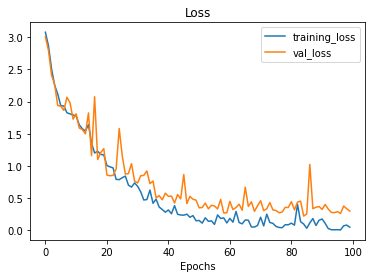

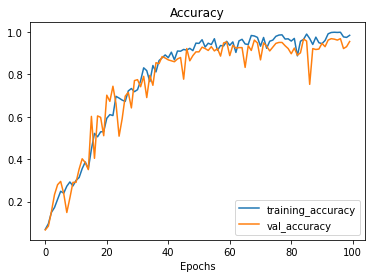

In [ ]:
plot_loss_curves(history)

In [ ]:
from sklearn import metrics



In [ ]:
y_true = testLabels
y_pred = model.predict(testData)
y_true = np.argmax(y_true, axis=-1)
y_pred = np.argmax(y_pred, axis=-1)
y_true.shape, y_pred.shape

15/15 [==============================] - 9s 47ms/step


((450,), (450,))

In [ ]:
#  from tensorflow.keras.callbacks import ModelCheckpoint
#  model = model.load_weights(checkoint_path)

In [ ]:
def get_className(files_list):
    classNames = []
    for file in files_list:
        label = file.split("/")[-1].split("_")[0]
        if label not in classNames:
            classNames.append(label)
    classNames.sort()
    return classNames

In [ ]:
import itertools

In [ ]:
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(20, 20), text_size=15, norm=False): 

    # Create the confustion matrix
    cm = metrics.confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
    n_classes = cm.shape[0] 
    # Plot the figure and make it pretty
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
    fig.colorbar(cax)

    # Are there a list of classes?
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    # Label the axes
    ax.set(title="Confusion Matrix",
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes), # create enough axis slots for each class
        yticks=np.arange(n_classes), 
        xticklabels=labels, # axes will labeled with class names (if they exist) or ints
        yticklabels=labels,
    )

    # Make x-axis labels appear on bottom
    ax.tick_params(axis='x', labelrotation=90)
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Set the threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if norm:
            plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                horizontalalignment="center",
                color="white" if cm[i, j] > threshold else "black",
                size=text_size)
        else:
            plt.text(j, i, f"{cm[i, j]}",
                horizontalalignment="center",
                color="white" if cm[i, j] > threshold else "black",
                size=text_size)

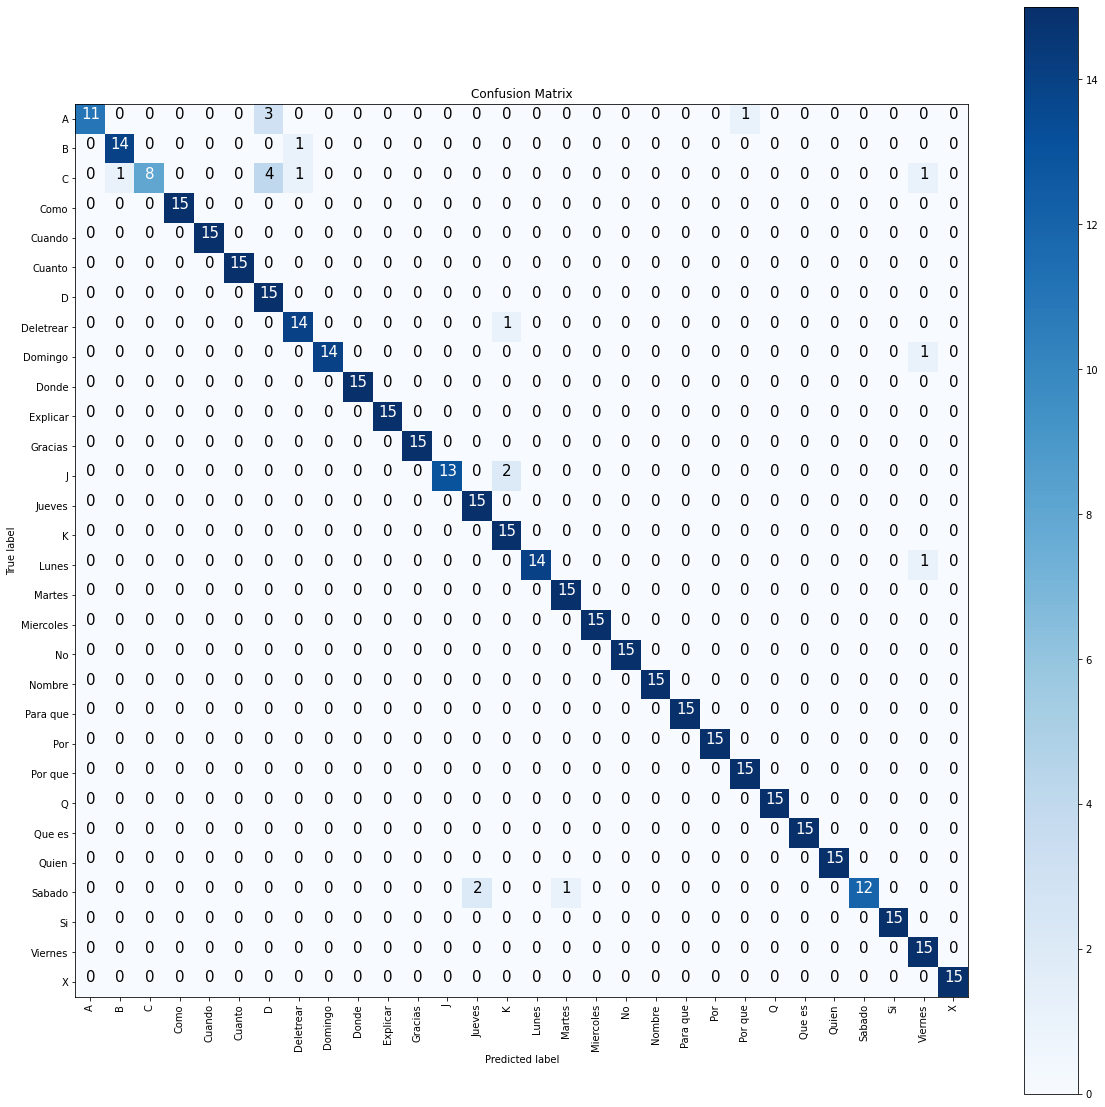

In [ ]:
make_confusion_matrix(y_true, y_pred, classNames)

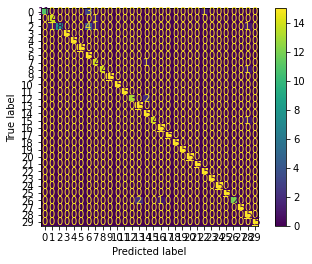

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = y_true
predicted = y_pred

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

In [ ]:
 model.evaluate(trainData, trainLabels, batch_size=32)

80/80 [==============================] - 4s 49ms/step - loss: 0.0136 - accuracy: 0.9965


[0.013589683920145035, 0.99647057056427]

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.73      0.85        15
           1       0.93      0.93      0.93        15
           2       1.00      0.53      0.70        15
           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00        15
           5       1.00      1.00      1.00        15
           6       0.68      1.00      0.81        15
           7       0.88      0.93      0.90        15
           8       1.00      0.93      0.97        15
           9       1.00      1.00      1.00        15
          10       1.00      1.00      1.00        15
          11       1.00      1.00      1.00        15
          12       1.00      0.87      0.93        15
          13       0.88      1.00      0.94        15
          14       0.83      1.00      0.91        15
          15       1.00      0.93      0.97        15
          16       0.94      1.00      0.97        15
          17       1.00    